In [ ]:
# run this first to get library necesary to read xls files 
#!pip install xlrd

# update seaborn to 0.11 version
# !pip install seaborn --upgrade

### Data Set Information:

This research aimed at the case of customer´s default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. Because the real probability of default is unknown, this study presented the novel â€œSorting Smoothing Methodâ€ to estimate the real probability of default. With the real probability of default as the response variable (Y), and the predictive probability of default as the independent variable (X), the simple linear regression result (Y = A + BX) shows that the forecasting model produced by artificial neural network has the highest coefficient of determination; its regression intercept (A) is close to zero, and regression coefficient (B) to one. Therefore, among the six data mining techniques, artificial neural network is the only one that can accurately estimate the real probability of default.


### Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 

- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
- X2: Gender (1 = male; 2 = female). 
- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
- X4: Marital status (1 = married; 2 = single; 3 = others). 
- X5: Age (year). 
- X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
- X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 
- X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005. 

In [40]:
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette("Paired")


pd.set_option('display.max_columns', 200)
pd.set_option('display.max_colwidth', 400)

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Load data


In [42]:
data = pd.read_excel("data/credit_card_clients.xls", header=1)

In [43]:
data.shape

(30000, 25)

In [44]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


### preprosecing data

change columns name 

In [45]:
data.rename(columns={"default payment next month": "target"}, inplace=True)
data.rename(columns=str.lower, inplace=True)

In [46]:
data.describe()

,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,target
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [47]:
data.dtypes

id           int64
limit_bal    int64
sex          int64
education    int64
marriage     int64
age          int64
pay_0        int64
pay_2        int64
pay_3        int64
pay_4        int64
pay_5        int64
pay_6        int64
bill_amt1    int64
bill_amt2    int64
bill_amt3    int64
bill_amt4    int64
bill_amt5    int64
bill_amt6    int64
pay_amt1     int64
pay_amt2     int64
pay_amt3     int64
pay_amt4     int64
pay_amt5     int64
pay_amt6     int64
target       int64
dtype: object

### Null analysis

There is not null values at all. But it seem some categorical values are. See categorical analysis below..

In [48]:
data.isnull().sum()

id           0
limit_bal    0
sex          0
education    0
marriage     0
age          0
pay_0        0
pay_2        0
pay_3        0
pay_4        0
pay_5        0
pay_6        0
bill_amt1    0
bill_amt2    0
bill_amt3    0
bill_amt4    0
bill_amt5    0
bill_amt6    0
pay_amt1     0
pay_amt2     0
pay_amt3     0
pay_amt4     0
pay_amt5     0
pay_amt6     0
target       0
dtype: int64

### Target

6636 clients will default next month from 30000  (22%). The target is not large unbalance. It may have been undersampled previously. 

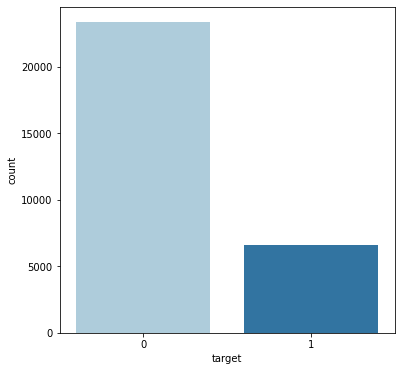

In [13]:
plt.figure(figsize=(6,6))
ax = sns.countplot(x="target", data=data)
plt.show()

### Categorical variables

#### maping categorical vars

From the metadata, we have seen that there are some categorical variables that have not information. For instance, Education doesn't have any description for values 5,6 and 0. Sames happen with marriage, where there is not description to value 0. Maybe this values shoul recategorized into unknown or as null.

In [56]:
data["sex"] = data.sex.map({1: "male", 2: "female"})

data["education"] = data.education.map({1: "graduate school", 2: "university", 
                                        3: "high school", 4: "others", 
                                        0: "unknow_0", 5: "unknow_5", 6: "unknow_6"})

data["marriage"] = data.marriage.map({1: "married", 2: "single", 
                                        3: "others", 0: "unknow"})

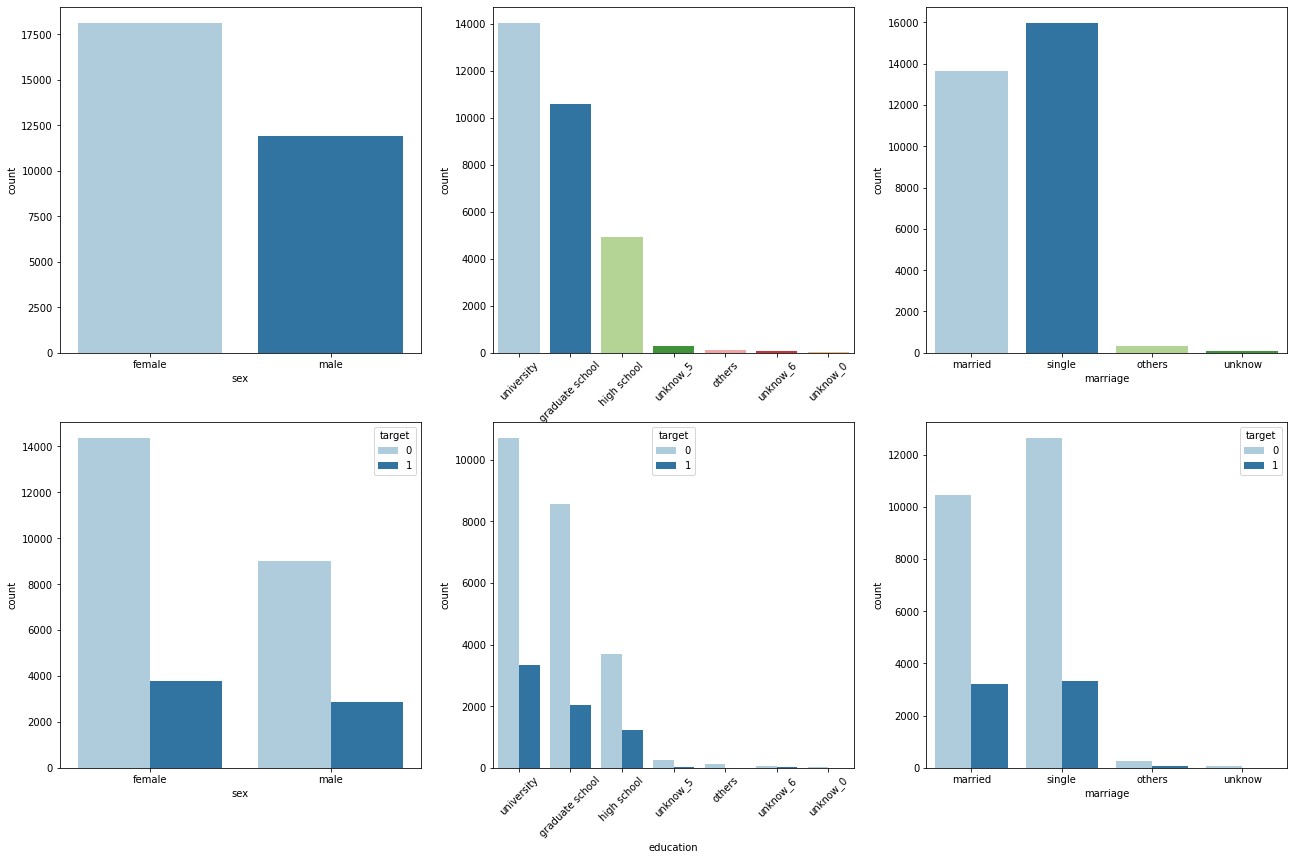

In [63]:
fig, ax =plt.subplots(2,3, figsize=(22,14))


cat_var = "sex"
#ax[0,0].set_xticklabels(ax[0,0].get_xticklabels(), rotation=45)
sns.countplot(x=cat_var, data=data, ax=ax[0,0])
#ax[1,0].set_xticklabels(ax[1,0].get_xticklabels(), rotation=45)
sns.countplot(x=cat_var, hue="target", data=data, ax=ax[1,0])


cat_var = "education"
ax[0,1].set_xticklabels(ax[0,1].get_xticklabels(), rotation=45)
sns.countplot(x=cat_var, data=data, ax=ax[0,1])
ax[1,1].set_xticklabels(ax[1,1].get_xticklabels(), rotation=45)
sns.countplot(x=cat_var, hue="target", data=data, ax=ax[1,1])

cat_var = "marriage"
sns.countplot(x=cat_var, data=data, ax=ax[0,2])
sns.countplot(x=cat_var, hue="target", data=data, ax=ax[1,2])

fig.show()

### Numerical variables

In [ ]:
- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
- X2: Gender (1 = male; 2 = female). 
- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
- X4: Marital status (1 = married; 2 = single; 3 = others). 
- X5: Age (year). 
- X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
- X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 
- X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005. 

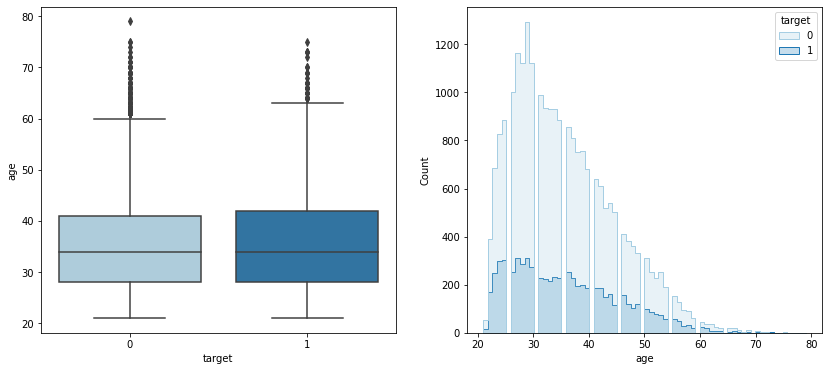

In [26]:
fig, ax =plt.subplots(1,2, figsize=(14,6))

sns.boxplot(x="target", y="age", data=data, ax=ax[0])

#sns.displot(data["age"], kde = True, bins = 100, ax=ax[1])

sns.histplot(data, x="age", hue="target", element="step", ax=ax[1])

fig.show()

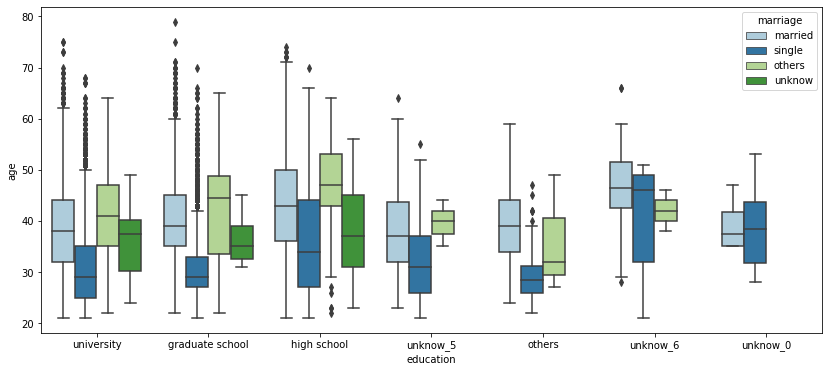

In [65]:
plt.figure(figsize=(14,6))
sns.boxplot(x="education", y="age", hue="marriage",data=data)
plt.show()

#### limit_bal

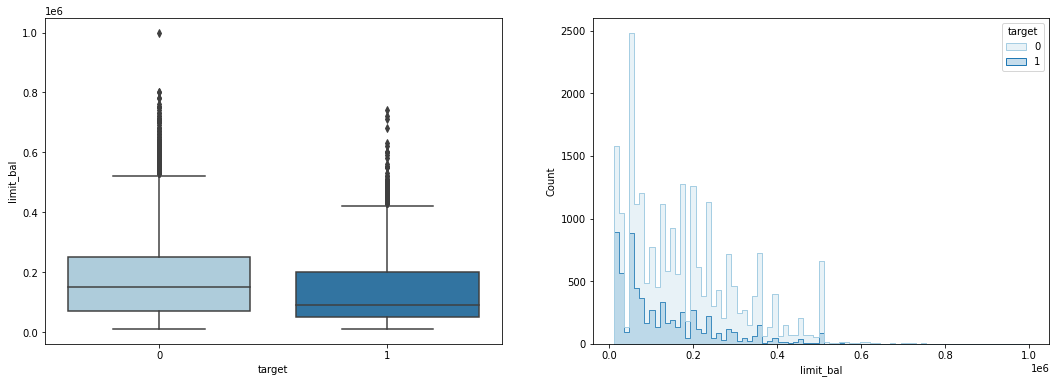

In [76]:
fig, ax =plt.subplots(1,2, figsize=(18,6))

sns.boxplot(x="target", y="limit_bal", data=data, ax=ax[0])

sns.histplot(data, x="limit_bal", hue="target", element="step", ax=ax[1])
fig.show()


- The largest number of credit cards are with limit of 50,000 (3365), followed by 20,000 (1976) and 30,000 (1610).
- Most of defaults are for credit limits 0-100000 (and density for this interval is larger for defaults than for non-defaults). 
- Larger defaults number are for the amounts of 50000, 20000 and 30000.
- It seem it has a normal dist.


In [77]:
data['limit_bal'].value_counts().head(5)

50000     3365
20000     1976
30000     1610
80000     1567
200000    1528
Name: limit_bal, dtype: int64

There are 81 distinct values for amount of credit limit.


In [78]:
data['limit_bal'].nunique()

81

Let's check the credit limit distribution vs. sex. 

- The limit credit amount is quite balanced between sex. 
- The males have a slightly smaller Q2 and larger Q3 and Q4 and a lower mean. 
- The female have a larger outlier max value (1M NT dollars).


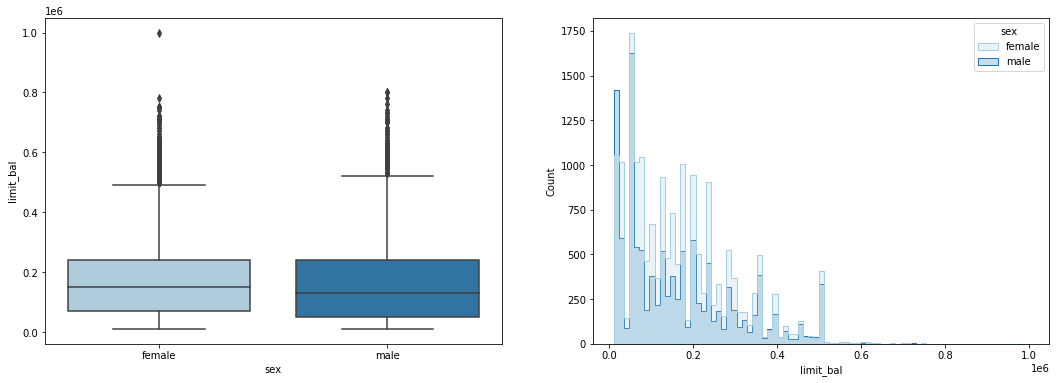

In [81]:
fig, ax =plt.subplots(1,2, figsize=(18,6))

sns.boxplot(x="sex", y="limit_bal", data=data, ax=ax[0])

sns.histplot(data, x="limit_bal", hue="sex", element="step", ax=ax[1])
fig.show()

Let's take a look credit amount limit distribution grouped by age and sex.

- Mean and variance (Q3 and Q4) increase for both male and female from 21 years to 35 years 

- There is an oscilating and then get to a maximum of Q4 for males at age 64.

- Mean values are smaller for males than for females, with some few exceptions, suck as 61, where mean values for males are generally larger than for females.


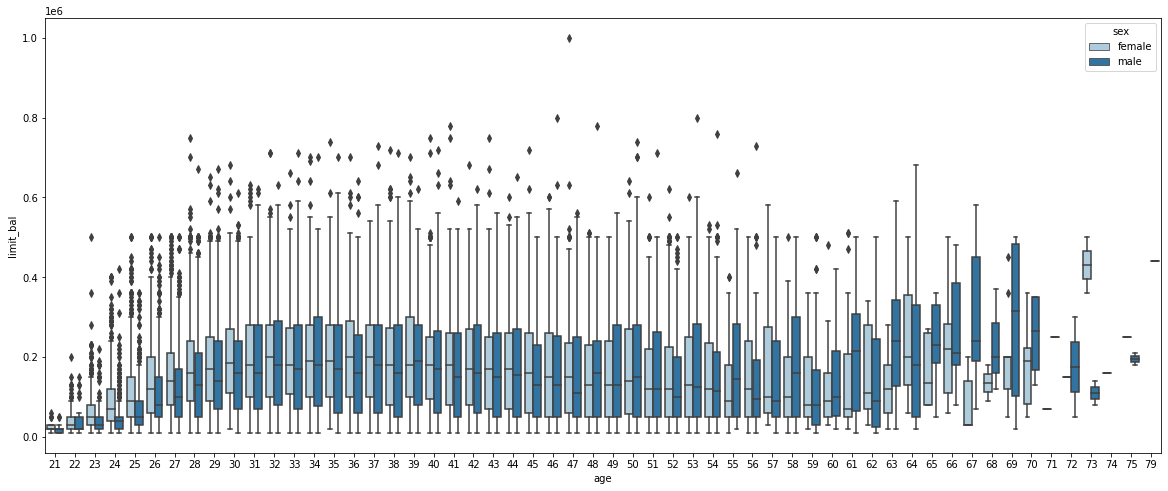

In [67]:
plt.figure(figsize=(20,8))
sns.boxplot(x="age", y="limit_bal", hue="sex",data=data)
plt.show()

Let's analysis each group of numerical values

#### History of past payment

- Many outliers. They must be analysed and processed.
- 'Normal' distribution
- It seem that some variables are good to discriminate the target.

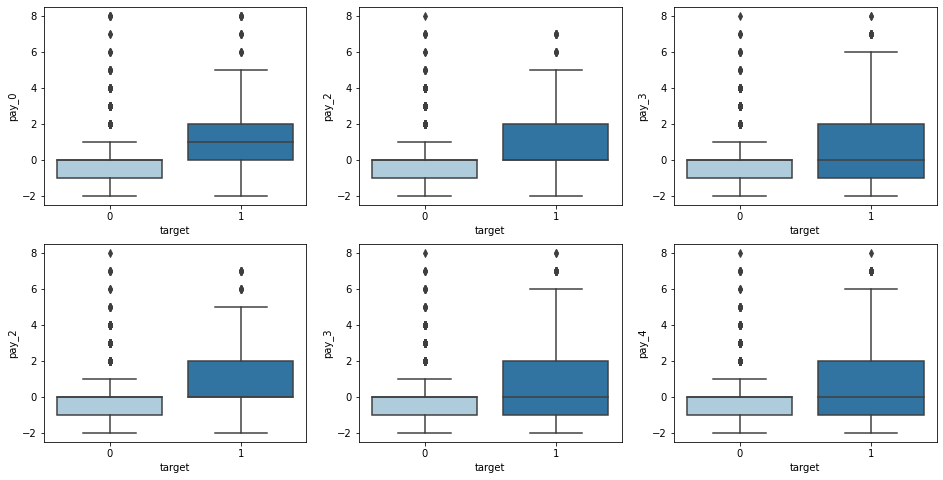

In [60]:
pastpayment_vars = ['pay_0', 'pay_2', 
                    'pay_3', 'pay_4', 
                    'pay_5', 'pay_6']

fig, ax =plt.subplots(2,3, figsize=(16,8))

for i in range(0,2):
    for j in range(0,3):
        num_var = pastpayment_vars[i + j]
        sns.boxplot(data=data, y=num_var, x='target',ax=ax[i,j])

fig.show()

<Figure size 1728x1728 with 0 Axes>

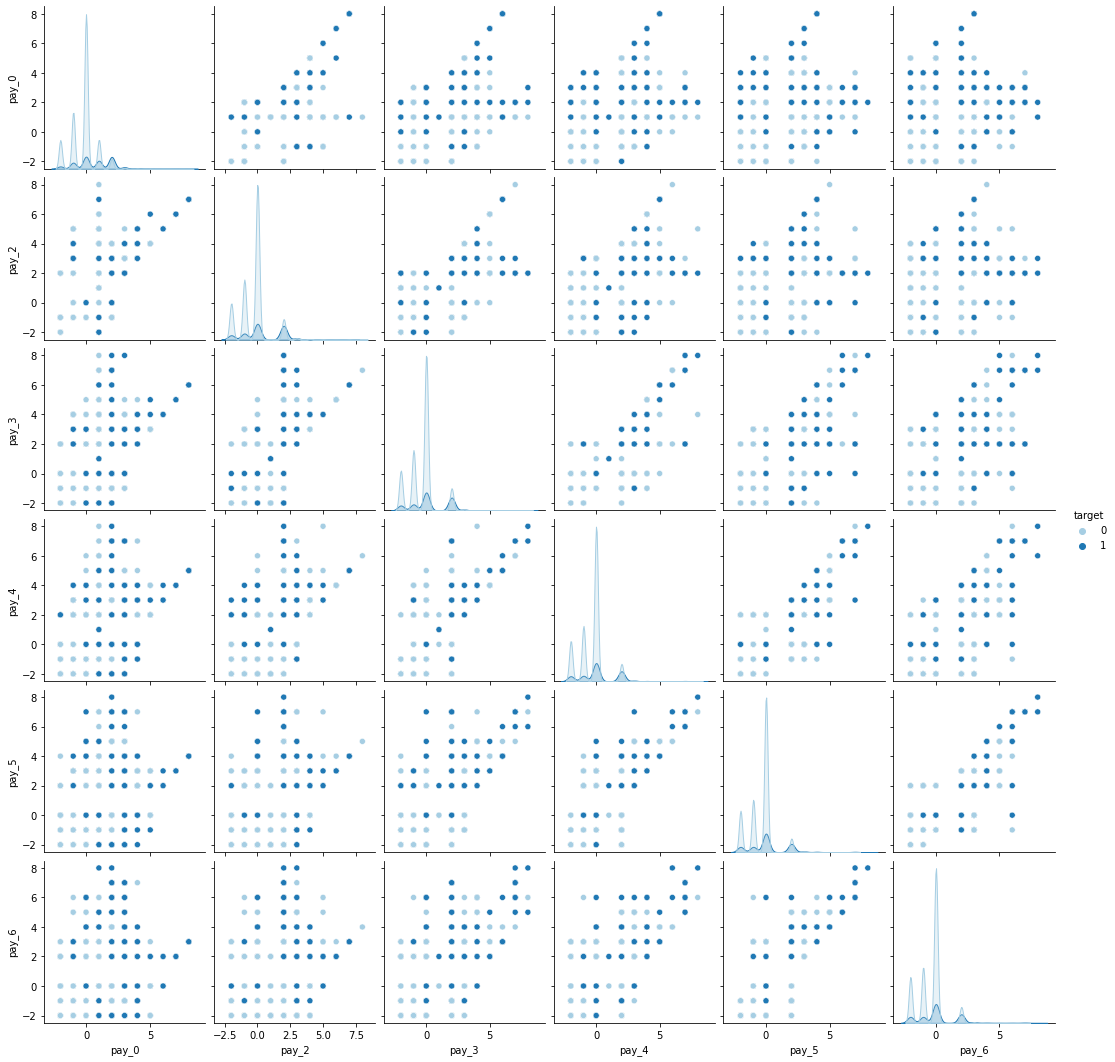

In [83]:
pastpayment_vars = ['pay_0', 'pay_2', 
                    'pay_3', 'pay_4', 
                    'pay_5', 'pay_6']
plt.figure(figsize=(24,24))

sns.pairplot(data=data.loc[:, pastpayment_vars + ["target"]], hue="target")
plt.show()

### Amount of bill statement 

- Many outliers. They must be analysed and processed.
- Skewed distribution
- It seem that some variables are good to discriminate the target.

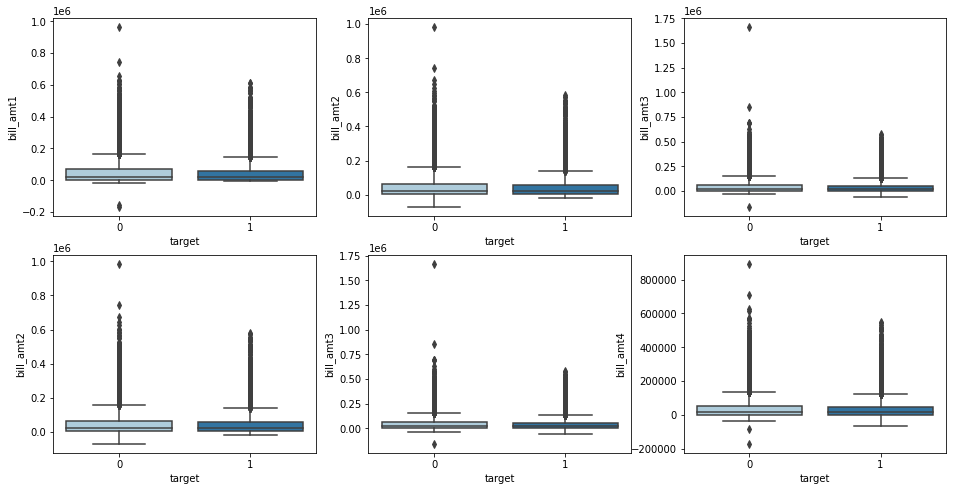

In [61]:
bill_amount_vars = ['bill_amt1', 'bill_amt2',
    'bill_amt3', 'bill_amt4', 
    'bill_amt5', 'bill_amt6']


fig, ax =plt.subplots(2,3, figsize=(16,8))

for i in range(0,2):
    for j in range(0,3):
        num_var = bill_amount_vars[i + j]
        sns.boxplot(data=data, y=num_var, x='target',ax=ax[i,j])

fig.show()

<Figure size 1728x1728 with 0 Axes>

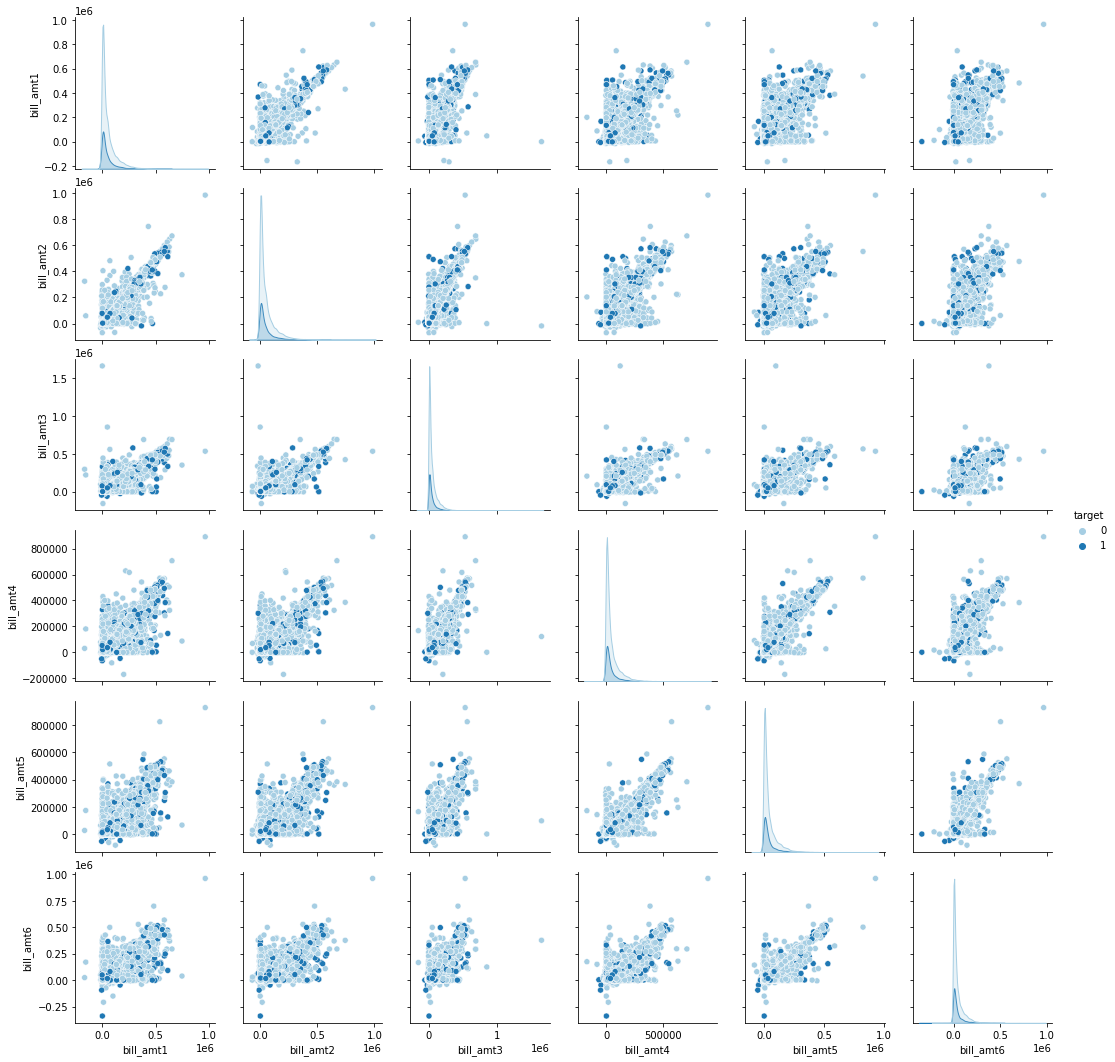

In [82]:
bill_amount_vars = ['bill_amt1', 'bill_amt2',
    'bill_amt3', 'bill_amt4', 
    'bill_amt5', 'bill_amt6']
plt.figure(figsize=(24,24))

sns.pairplot(data=data.loc[:, bill_amount_vars + ["target"]], hue="target")
plt.show()

#### Amount of previous payment

- Too much outliers. They must be analysed and processed.
- Most values are close to zero. 
- Skewed distribution
- From boxplot, we can infer that most variables are not good to discriminate the target.

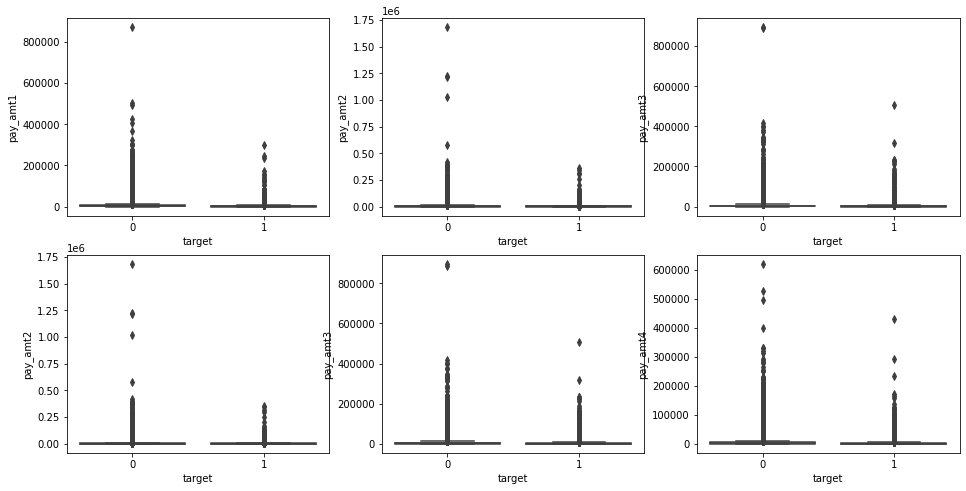

In [62]:
payment_amount_vars = ['pay_amt1', 'pay_amt2', 
'pay_amt3', 'pay_amt4', 
'pay_amt5', 'pay_amt6']


fig, ax =plt.subplots(2,3, figsize=(16,8))

for i in range(0,2):
    for j in range(0,3):
        num_var = payment_amount_vars[i + j]
        sns.boxplot(data=data, y=num_var, x='target',ax=ax[i,j])

fig.show()

<Figure size 1728x1728 with 0 Axes>

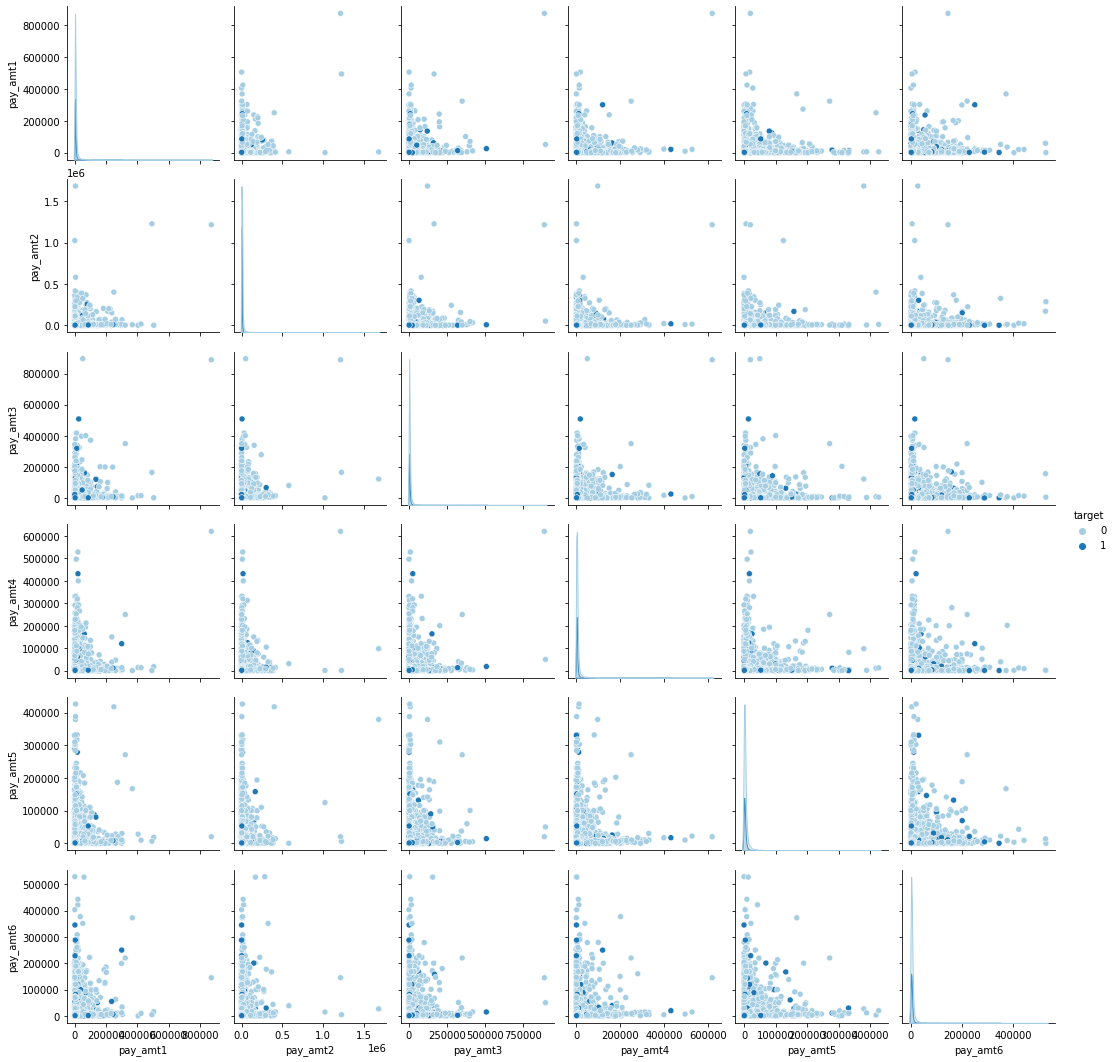

In [33]:
payment_amount_vars = ['pay_amt1', 'pay_amt2', 
'pay_amt3', 'pay_amt4', 
'pay_amt5', 'pay_amt6']
plt.figure(figsize=(24,24))
sns.pairplot(data=data.loc[:, payment_amount_vars + ["target"]], hue="target")
plt.show()

#### Features correlation

For numeric values, let's see the features correlation.

- Repayment status: Correlation is decreasing with distance between months. Lowest correlations are between Sept-April.
- Bill Amount: Correlation decrease by distance between months. There is a high correlation between each consecutive months. Lowest correlations are between Sept-April.
- Amount of previous payment: There are no correlations between amounts of previous payments for April-Sept 2005.


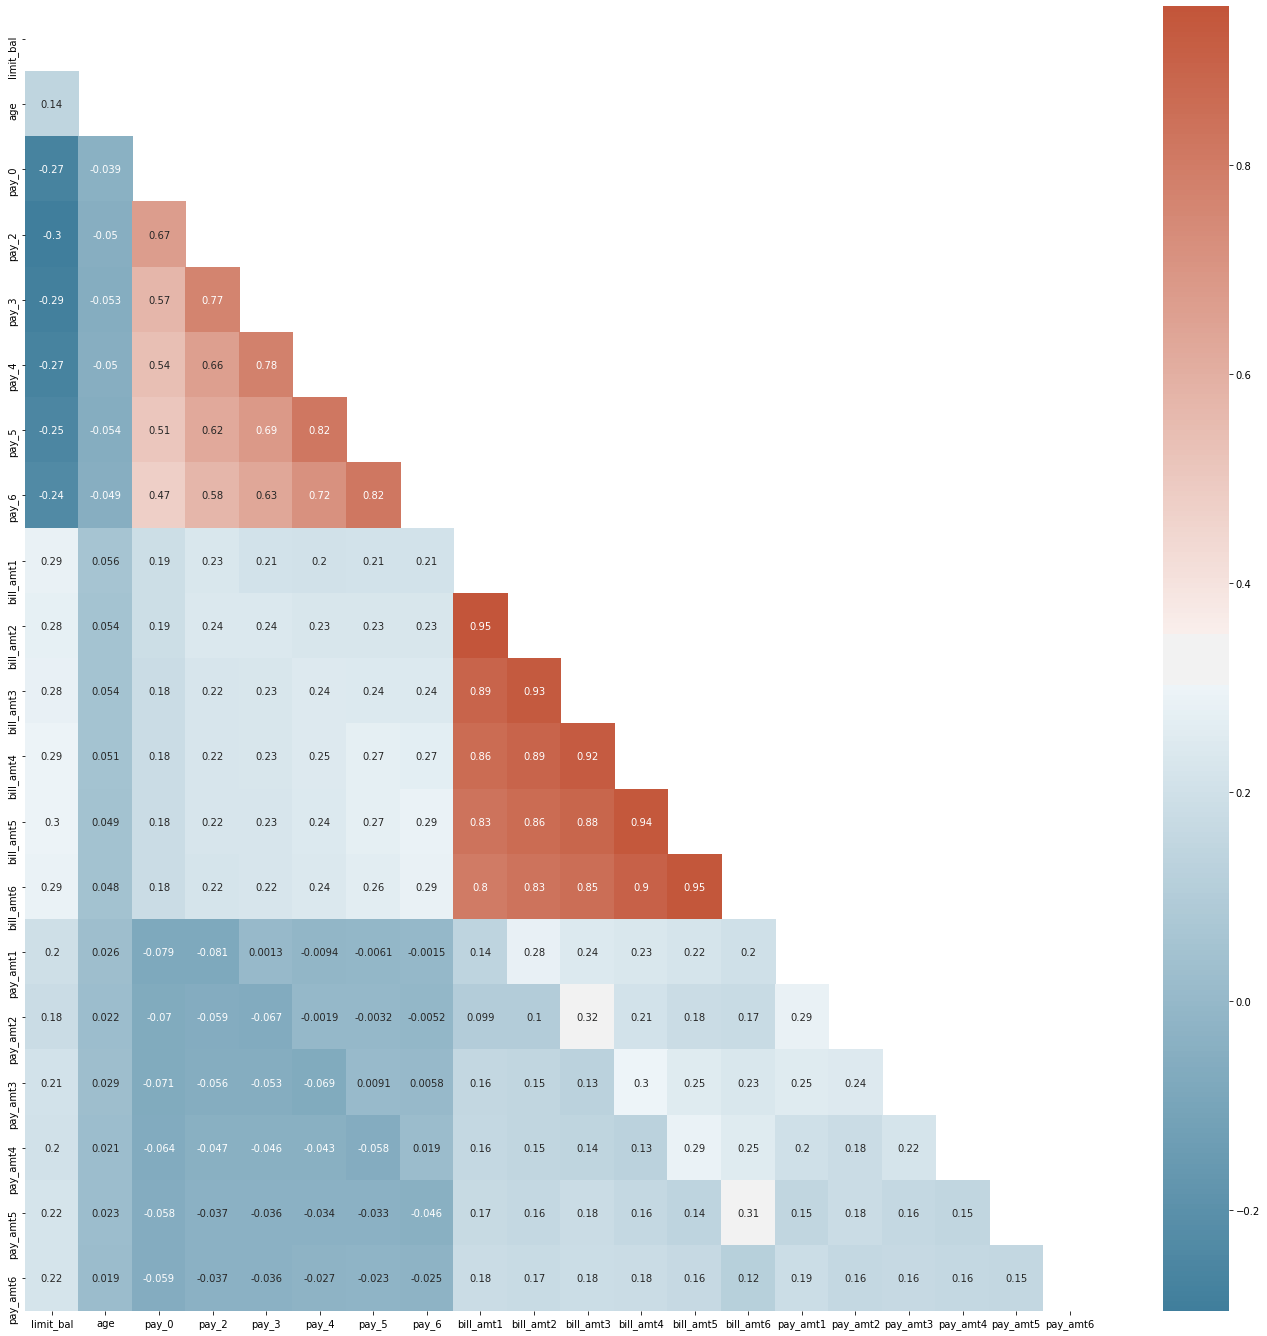

In [67]:
num_vars = ['limit_bal', 'age', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 
            'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 
            'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6']

corr = data.loc[:, num_vars].corr(method="pearson")

f, ax = plt.subplots(figsize=(24, 24))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)
plt.show()